# Project Description
Cardiac disorders also known narrowly as “heart diseases” are the cause of most deaths worldwide. Heart disease has become a cause of increasing concern for this country with patients enduring several sorts of related illnesses. Death is inevitable if some of the related diseases are diagnosed too late.

In our project we will try to generate a predictive model of heart diseases which will be used for early detections.
Our focus is  


*   Finding the pre-processing techniques works best for specific models.
*   Improving the exsisting models
*   Creating combined prediction from two or more dataset





# Loading The Necessary Libraries


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Loading Dataset

Age
Sex : male : 1
female : 0

chest pain type
-- Value 1: typical angina
-- Value 2: atypical angina
-- Value 3: non-anginal pain
-- Value 4: asymptomatic

resting blood pressure (in mm Hg on admission to the hospital

serum cholestoral in mg/dl

(fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)

resting electrocardiographic results

-- Value 0: normal
-- Value 1: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)
-- Value 2: showing probable or definite left ventricular hypertrophy by Estes' criteria

thalach: maximum heart rate achieved

exercise induced angina (1 = yes; 0 = no)

Angina is chest pain or discomfort caused when your heart muscle doesn't get enough oxygen-rich blood.
It may feel like pressure or squeezing in your chest.

oldpeak = ST depression induced by exercise relative to rest

slope: the slope of the peak exercise ST segment

--Value 1: upsloping
-- Value 2: flat
-- Value 3: downsloping

vessels colored by flourosopy : number of major vessels (0-3) colored by flourosopy

A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

Target : 0 No Heart disease
1 Heart disease



In [ ]:
df = pd.read_csv('UCI-Heart-Dataset.csv')

# Data visualization

In [ ]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
df.shape

(303, 14)

In [ ]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
#sns.pairplot(df,hue = 'target')

#### Checking if there is any null value in the dataframe

In [ ]:
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### Checking For Duplicates

In [ ]:
if(df.duplicated().sum()>0):
  print("Duplicates Found.Removing Duplicate")
  df=df.drop_duplicates(keep = 'first')

Duplicates Found.Removing Duplicate


No duplicates after removing them

In [ ]:
df.duplicated().sum()

0

Dataset contains 164 Heart Disease Patients
and 138 Non Heart Disease Patients

In [ ]:
df.target.value_counts()

1    164
0    138
Name: target, dtype: int64

#### Representation in graph

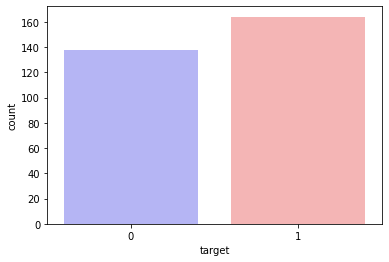

In [ ]:
sns.countplot(x="target", data=df, palette="bwr")
plt.show()

In [ ]:
print(round(df.target.value_counts()[0]*100/sum(df.target.value_counts()),2),"% of Non-Heart Disease Patients")
print(round(df.target.value_counts()[1]*100/sum(df.target.value_counts()),2),"% of Heart Disease Patients")

45.7 % of Non-Heart Disease Patients
54.3 % of Heart Disease Patients


#### Percantage of male and female entries 

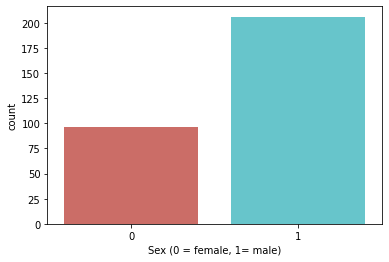

In [ ]:
sns.countplot(x='sex', data=df, palette="hls")
plt.xlabel("Sex (0 = female, 1= male)")
plt.show()

In [ ]:
print(round(df.sex.value_counts()[0]*100/sum(df.target.value_counts()),2),"% of Female Patients")
print(round(df.sex.value_counts()[1]*100/sum(df.target.value_counts()),2),"% of Male Patients")

31.79 % of Female Patients
68.21 % of Male Patients


#### Heart Disease Frequency-Age Bar Chart

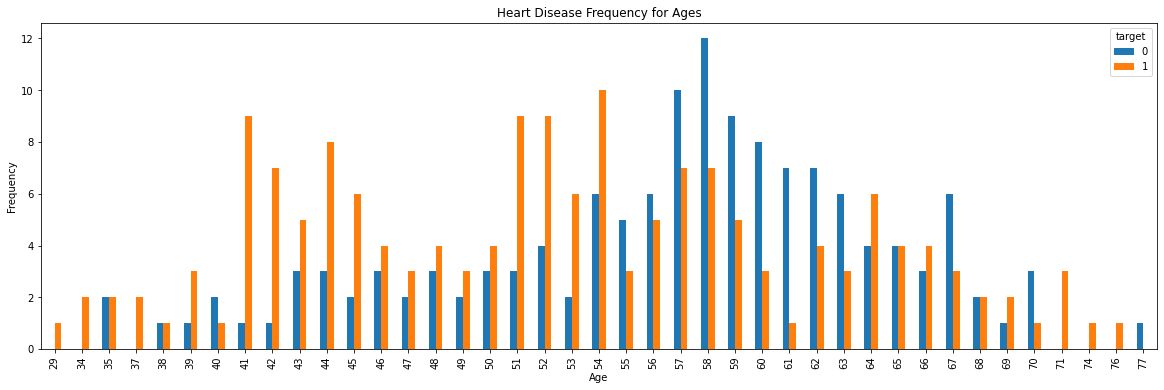

In [ ]:
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(20,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Calculating The Average Age of CVD Patients

In [ ]:
print("Average Age of CVD patients:", round(df.groupby('target').mean()['age'][1]))

Average Age of CVD patients: 53


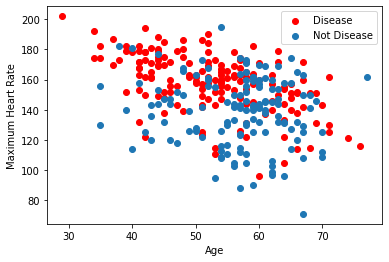

In [ ]:
plt.scatter(x=df.age[df.target==1], y=df.thalach[(df.target==1)], c="red")
plt.scatter(x=df.age[df.target==0], y=df.thalach[(df.target==0)])
plt.legend(["Disease", "Not Disease"])
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate")
plt.show()

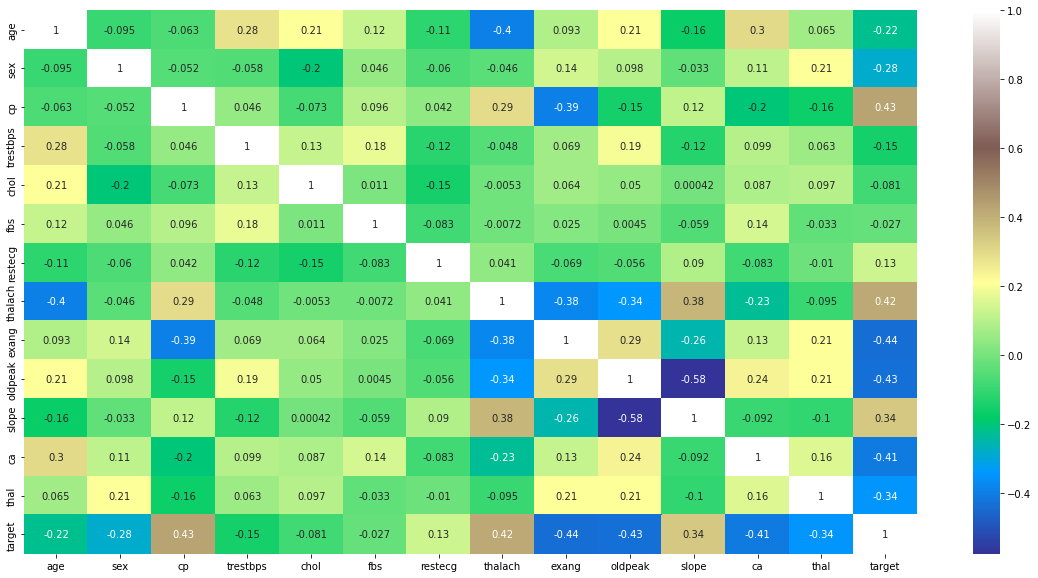

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='terrain')

#### Graphical Representation of affected Male and Female Ratio by CVD

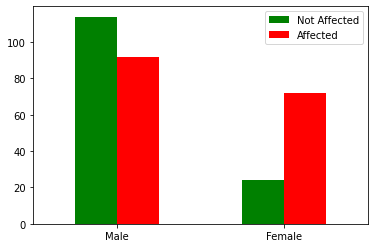

In [ ]:

Affected = [len(df[(df['sex']== 1) & (df['target']==1)]['target']),len(df[(df['sex']== 0) & (df['target']==1)]['target'])]
Not_Affected = [len(df[(df['sex']== 1) & (df['target']==0)]['target']),len(df[(df['sex']== 0) & (df['target']==0)]['target'])]
index = df['sex'].replace(0, 'Female').replace(1, 'Male').unique()
axdf = pd.DataFrame({'Not Affected': Not_Affected,
                   'Affected': Affected,}, index=index)
ax = axdf.plot.bar(rot=0,color={"Affected": "red", "Not Affected": "green"})

In [ ]:
x=df.iloc[:,:-1]

In [ ]:
y=df.iloc[:,-1]

In [ ]:
x

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3


In [ ]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 302, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=40)

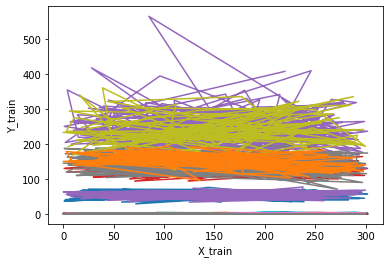

In [ ]:
plt.plot(X_train)
plt.plot(Y_train)
plt.plot(X_test)
plt.plot(Y_test)
plt.xlabel('X_train')
plt.ylabel('Y_train')
plt.show()

# Feature Engineering: Feature Selection & Model Testing 

**LogisticRegression**

In [ ]:
from sklearn.linear_model import LogisticRegression


model1=LogisticRegression(random_state=0,max_iter=1000).fit(X_train,Y_train)

In [ ]:
model1.score(X_test,Y_test)

0.8791208791208791

##Feature Importance

### Feature Selection using KBest f_classif

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif


fit_feature=SelectKBest(score_func=f_classif)
fit_feature.fit(x,y)

SelectKBest()

In [ ]:
score=pd.DataFrame(fit_feature.scores_,columns=['Score'])

In [ ]:
df_column_names=pd.DataFrame(x.columns)
df_column_names

,0
0,age
1,sex
2,cp
3,trestbps
4,chol
5,fbs
6,restecg
7,thalach
8,exang
9,oldpeak


In [ ]:
feature_score=pd.concat([df_column_names,score],axis=1)
feature_score.nlargest(13,'Score')

,0,Score
8,exang,70.255191
2,cp,68.864299
9,oldpeak,67.721931
7,thalach,64.237793
11,ca,60.262749
10,slope,40.249626
12,thal,40.027376
1,sex,26.240952
0,age,15.474511
3,trestbps,6.558676


#### XGB Classifier

In [ ]:
import xgboost
import matplotlib.pyplot as plt

model = xgboost.XGBClassifier()
model.fit(x,y)

XGBClassifier()

In [ ]:
print(model.feature_importances_) 

[0.0452967  0.0582311  0.19872148 0.02975759 0.03289822 0.03209292
 0.03474128 0.0361915  0.08743005 0.08011568 0.05851538 0.11920866
 0.18679938]


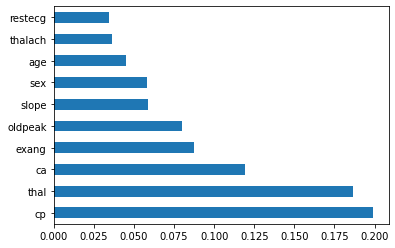

<Figure size 576x432 with 0 Axes>

In [ ]:
# plot the graph of feature importances for better visualization 

feat_imp = pd.Series(model.feature_importances_, index=x.columns)
feat_imp.nlargest(10).plot(kind='barh')

plt.figure(figsize=(8,6))
plt.show()

([<matplotlib.patches.Wedge at 0x7f4d602b2450>,
 [Text(2.927200881624168, 1.5236452994771106, 'exang'),
  Text(0.4622218634431553, 3.2674685842338467, 'cp'),
  Text(-2.349988045701953, 2.3167986932528075, 'oldpeak'),
  Text(-3.275008468392171, -0.40536345661587153, 'thalach'),
  Text(-1.8555984997957702, -2.728874164844486, 'ca'),
  Text(0.2947788102457725, -3.286807790703632, 'slope'),
  Text(1.9649947457632966, -2.651187592216484, 'thal'),
  Text(2.9266580224425502, -1.524687777767193, 'sex'),
  Text(3.2372557733697565, -0.640449106318513, 'age'),
  Text(3.4964877643656482, -0.15675877532474453, 'trestbps')],
 [Text(1.596655026340455, 0.831079254260242, '15.3%'),
  Text(0.25212101642353923, 1.7822555914002796, '15.0%'),
  Text(-1.281811661291974, 1.2637083781378946, '14.7%'),
  Text(-1.7863682554866385, -0.2211073399722935, '14.0%'),
  Text(-1.0121446362522382, -1.488476817187901, '13.1%'),
  Text(0.16078844195223954, -1.7928042494747078, '8.8%'),
  Text(1.0718153158708887, -1.446102

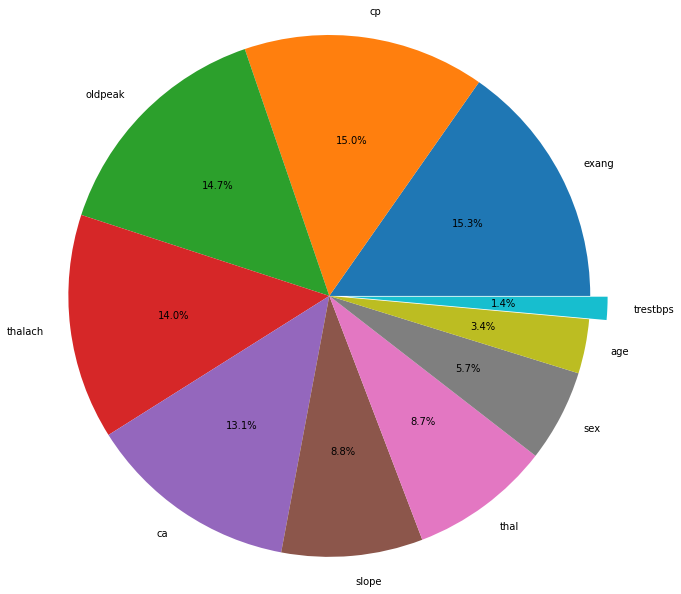

In [ ]:
import warnings
warnings.filterwarnings('ignore')
exp=[0,0,0,0,0,0,0,0,0,0.2]
plt.pie(feature_score.nlargest(13,'Score')['Score'][:-3],labels=feature_score.nlargest(13,'Score')[0][:-3],explode=exp,radius=3,autopct='%2.1f%%')

In [ ]:
X_train_fs = X_train.drop(['chol','fbs','trestbps'], axis = 1)
X_test_fs = X_test.drop(['chol','fbs','trestbps'], axis = 1)

In [ ]:
X_train_fs

,age,sex,cp,restecg,thalach,exang,oldpeak,slope,ca,thal
33,54,1,2,0,152,0,0.5,0,1,2
239,35,1,0,0,156,1,0.0,2,0,3
139,64,1,0,1,105,1,0.2,1,1,3
297,59,1,0,0,90,0,1.0,1,2,1
193,60,1,0,0,142,1,2.8,1,2,3
...,...,...,...,...,...,...,...,...,...,...
269,56,1,0,0,103,1,1.6,0,0,3
194,60,1,2,0,155,0,3.0,1,0,2
166,67,1,0,0,129,1,2.6,1,2,3
7,44,1,1,1,173,0,0.0,2,0,3


In [ ]:
from sklearn.linear_model import LogisticRegression


model1=LogisticRegression(random_state=0,max_iter=1000).fit(X_train_fs,Y_train)

In [ ]:
model1.score(X_test_fs,Y_test)

0.9010989010989011

In [ ]:
from sklearn.preprocessing import StandardScaler
standardScaler = StandardScaler()  
scalable_columns=['age','thalach','oldpeak','trestbps','chol']
df[scalable_columns]=standardScaler.fit_transform(df[scalable_columns])

In [ ]:
x=df.iloc[:,:-1]
y= df['target']

In [ ]:
from sklearn.model_selection import train_test_split
X_train_sc, X_test_sc, Y_train, Y_test = train_test_split(x, y, test_size=0.3, random_state=40)

In [ ]:
X_train_sc

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
33,-0.046555,1,2,-0.376556,0.512893,0,0,0.106294,0,-0.468334,0,1,2
239,-2.149959,1,0,-0.319525,0.687083,0,0,0.281229,1,-0.899544,2,0,3
139,1.060500,1,0,-0.205463,0.319348,0,1,-1.949198,1,-0.727060,1,1,3
297,0.506972,1,0,1.847657,-1.364488,1,0,-2.605206,0,-0.037124,1,2,1
193,0.617678,1,0,0.764066,0.687083,0,0,-0.331045,1,1.515232,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
269,0.174856,1,0,-0.091401,0.706437,1,0,-2.036666,1,0.480328,0,0,3
194,0.617678,1,2,0.478910,-1.190298,0,0,0.237495,0,1.687716,1,0,2
166,1.392616,1,0,-0.661712,-0.338703,0,0,-0.899585,1,1.342748,1,2,3
7,-1.153610,1,1,-0.661712,0.319348,0,1,1.024705,0,-0.899544,2,0,3


In [ ]:
from sklearn.linear_model import LogisticRegression


model1=LogisticRegression(random_state=0,max_iter=1000).fit(X_train_sc,Y_train)

In [ ]:
model1.score(X_test_sc,Y_test)

0.8791208791208791

In [ ]:
X_label_enc = pd.get_dummies(df, columns=['sex', 'cp','fbs','restecg','exang','slope','ca','thal'])
X_label_enc=X_label_enc.drop(['target'], axis=1)
X_label_enc.head()

,age,trestbps,chol,thalach,oldpeak,sex_0,sex_1,cp_0,cp_1,cp_2,...,slope_2,ca_0,ca_1,ca_2,ca_3,ca_4,thal_0,thal_1,thal_2,thal_3
0,0.949794,0.764066,-0.261285,0.018826,1.084022,0,1,0,0,0,...,0,1,0,0,0,0,0,1,0,0
1,-1.928548,-0.091401,0.067741,1.636979,2.118926,0,1,0,0,1,...,0,1,0,0,0,0,0,0,1,0
2,-1.485726,-0.091401,-0.822564,0.980971,0.307844,1,0,0,1,0,...,1,1,0,0,0,0,0,0,1,0
3,0.174856,-0.661712,-0.203222,1.243374,-0.209608,0,1,0,1,0,...,1,1,0,0,0,0,0,0,1,0
4,0.285561,-0.661712,2.080602,0.587366,-0.382092,1,0,1,0,0,...,1,1,0,0,0,0,0,0,1,0


In [ ]:
from sklearn.model_selection import train_test_split
X_train_enc, X_test_enc, Y_train, Y_test = train_test_split(X_label_enc, y, test_size=0.3, random_state=40)

In [ ]:
from sklearn.linear_model import LogisticRegression


model1=LogisticRegression(random_state=0,max_iter=5000).fit(X_train_enc,Y_train)

In [ ]:
model1.score(X_test_enc,Y_test)

0.9010989010989011

**Random Forest Classifier**

#### With All Feature

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train,Y_train)
Rfc.score(X_test,Y_test)

0.8901098901098901

#### With Selected Feature

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train_fs,Y_train)
Rfc.score(X_test_fs,Y_test)

0.8571428571428571

#### With Feature Scaling

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train_sc,Y_train)
Rfc.score(X_test_sc,Y_test)

0.8461538461538461

With One Hot Encoding

In [ ]:
from sklearn.ensemble import RandomForestClassifier
Rfc = RandomForestClassifier()
Rfc.fit(X_train_enc,Y_train)
Rfc.score(X_test_enc,Y_test)

0.8791208791208791

**Support Vector Machine(SVM)**

#### With All Feature

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train,Y_train)
classifier.score(X_test,Y_test)

0.8681318681318682

#### With Selected Feature

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_fs,Y_train)
classifier.score(X_test_fs,Y_test)

0.8791208791208791

#### With Feature Scaling

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_sc,Y_train)
classifier.score(X_test_sc,Y_test)

0.8791208791208791

With One Hot Encoding

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'linear', random_state = 0)
classifier.fit(X_train_enc,Y_train)
classifier.score(X_test_enc,Y_test)

0.8681318681318682

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout,Activation,Flatten
from tensorflow.keras.optimizers import Adam
from sklearn import metrics

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

def getClassificationResult(model,x_test,y_test):
    y_true=y_test
    y_pred=model.predict(x_test)
    
    if len(y_pred.shape) == 2:
        y_pred=np.argmax(y_pred, axis=1)
    if len(y_true.shape) == 2:
        y_true=np.argmax(y_true, axis=1)
    ac=round(accuracy_score(y_true, y_pred),4)
    pr=round(precision_score(y_true, y_pred,average='weighted'),4)
    re=round(recall_score(y_true, y_pred,average='weighted'),4)
    f1=round(f1_score(y_true, y_pred,average='weighted'),4)
    #print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)
    return ac,pr,re,f1

In [ ]:
getClassificationResult(classifier,X_test_enc,Y_test)

(0.8791, 0.8798, 0.8791, 0.8785)

# Following Given NN Structure from Paper

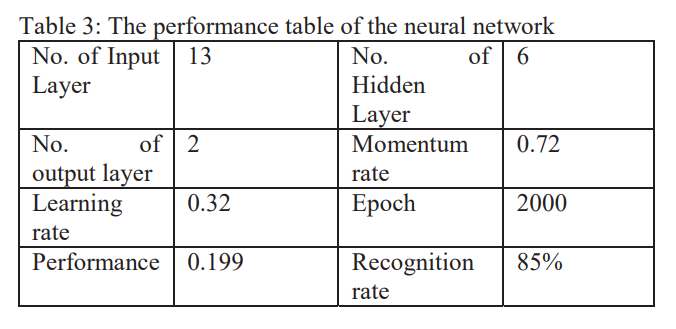

In [ ]:
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
labelEncoder= LabelEncoder()



#extracted_features_df=pd.DataFrame(total,columns=['feature','class'])

#x=np.array(extracted_features_df['mfccs'].tolist())
#x=np.hstack([np.array(extracted_features_df['mfccs'].tolist()),np.array(extracted_features_df['chroma'].tolist()),np.array(extracted_features_df['spectogram'].tolist()),np.array(extracted_features_df['contrast'].tolist()),np.array(extracted_features_df['tonnetz'].tolist())])

#y=np.array(extracted_features_df['class'].tolist())
y_train_new=to_categorical(labelEncoder.fit_transform(Y_train))
y_test_new=to_categorical(labelEncoder.fit_transform(Y_test))
num_labels=y_train_new.shape[1]
num_labels


2

In [ ]:
import tensorflow as tf


model1=Sequential()
#first layer
model1.add(Dense(100,input_shape=(13,)))
model1.add(Activation('sigmoid'))

#second layer
model1.add(Dense(3))
model1.add(Activation('sigmoid'))

#third layer
model1.add(Dense(3))
model1.add(Activation('sigmoid'))

#fourth layer
model1.add(Dense(3))
model1.add(Activation('sigmoid'))

#fifth layer
model1.add(Dense(3))
model1.add(Activation('sigmoid'))

#sixth layer
model1.add(Dense(3))
model1.add(Activation('sigmoid'))


#final layer
model1.add(Dense(2))
model1.add(Activation('sigmoid'))


optimizer = tf.keras.optimizers.Adam(lr=0.0032)
model1.compile(loss='mse',metrics=['accuracy'],optimizer=optimizer)

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:


history1=model1.fit(X_train_sc,y_train_new,batch_size=32,epochs=2000,validation_data=(X_test_sc,y_test_new))

Epoch 1/2000
7/7 [==============================] - 1s 30ms/step - loss: 0.2512 - accuracy: 0.5355 - val_loss: 0.2505 - val_accuracy: 0.5604
Epoch 2/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.2506 - accuracy: 0.5355 - val_loss: 0.2499 - val_accuracy: 0.5604
Epoch 3/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.2501 - accuracy: 0.5355 - val_loss: 0.2493 - val_accuracy: 0.5604
Epoch 4/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.2498 - accuracy: 0.5355 - val_loss: 0.2487 - val_accuracy: 0.5604
Epoch 5/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.2496 - accuracy: 0.5355 - val_loss: 0.2482 - val_accuracy: 0.5604
Epoch 6/2000
7/7 [==============================] - 0s 7ms/step - loss: 0.2492 - accuracy: 0.5355 - val_loss: 0.2480 - val_accuracy: 0.5604
Epoch 7/2000
7/7 [==============================] - 0s 6ms/step - loss: 0.2491 - accuracy: 0.5355 - val_loss: 0.2478 - val_accuracy: 0.5604
Epoch 8/2000
7/7 [=

In [ ]:
model1.evaluate(X_test_sc,y_test_new)[1]

3/3 [==============================] - 0s 5ms/step - loss: 0.1190 - accuracy: 0.8571


0.8571428656578064

Accuracy Curve

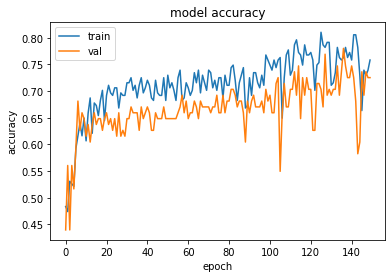

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Loss Curve

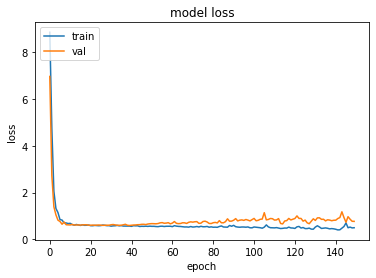

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

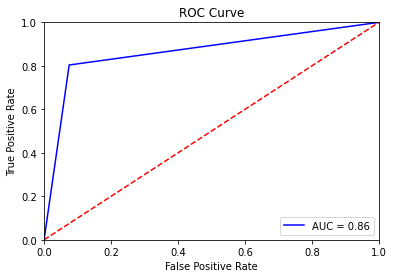

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = model1.predict(X_test_sc)

fpr, tpr, threshold = metrics.roc_curve(y_test_new.argmax(axis=1), preds.argmax(axis=1))
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



# Increasing Accuracy via Our Custom Designed Models

Model 1:Artificial Neural Network in Pytorch (96% Accuracy)

In [ ]:
import torch
import torch.nn as nn
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

In [ ]:
# get a dataset 
# Importing the dataset
dataset = pd.read_csv('heart.csv')
X = dataset.iloc[:, 0:14].values
y = dataset.iloc[:, -1].values

n_samples, n_features = X.shape
#print(n_samples,n_features)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10,shuffle=True)

In [ ]:
### scale
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

X_train = torch.from_numpy(X_train.astype(np.float32))
X_test = torch.from_numpy(X_test.astype(np.float32))
y_train = torch.from_numpy(y_train.astype(np.float32))
y_test = torch.from_numpy(y_test.astype(np.float32))


### turn into column
y_train = y_train.view(y_train.shape[0], 1)
y_test = y_test.view(y_test.shape[0], 1)


In [ ]:
class Model(nn.Module):
    def __init__(self,input_size,hidden_size,num_classes):
        super(Model,self).__init__()
        self.l1=nn.Linear(input_size,hidden_size)
        self.relu=nn.ReLU()
        self.l2=nn.Linear(hidden_size,num_classes)

    def forward(self, x):
        out=self.l1(x)
        out=self.relu(out)
        out=self.l2(out)
        return out

model = Model(n_features,300,1)



In [ ]:
#calculating loss and using stochastic gradient descent as optimizer 
num_epochs = 80
learning_rate = 0.01
criterion = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

In [ ]:
def binary_accuracy(preds, y):
    """
    Returns accuracy per batch, i.e. if you get 8/10 right, this returns 0.8, NOT 8
    """

    
    rounded_preds = torch.round(torch.sigmoid(preds))
    correct = (rounded_preds == y).float() #convert into float for division 
    acc = correct.sum() / len(correct)
    return acc

In [ ]:
from numpy.lib.function_base import append


TP=[]
TN=[]
FP=[]
FN=[]
def testModel(model, loss_fn):
    model.eval()

    size = X_test.shape[0]

    loss = 0
    acc = 0



    with torch.no_grad():
      for i in range(X_test.shape[0]):
        x, y = X_test[i], torch.tensor([y_test[i]], dtype=torch.float)
    
        
        pred = model(x)
        if( (torch.round(pred)) == 1 and y== 0) :
           FP.append(1)
        if( (torch.round(pred)) == 0 and y== 1) :
           FN.append(1)
        if( (torch.round(pred)) == 1 and y== 1) :
           TP.append(1)
        if( (torch.round(pred)) == 0 and y== 0) :
           TP.append(1)         
       
            
        loss += loss_fn(pred, y).item()
        acc += binary_accuracy(pred,y).item()
      
    loss /= size
    acc /= size
    
  
  
    return loss, acc  

In [ ]:
# 3) Training with epoch
losshist=[]
acchist=[]
vlosshist=[]
vacchist=[]
for epoch in range(num_epochs):
    # Forward propagation with calculating loss
    y_pred = model(X_train)
    loss = criterion(y_pred, y_train)

    # backward propagation and updating weights
    loss.backward()
    optimizer.step()

    # using zero grad 
    optimizer.zero_grad()

    #printing epoch and loss
    ep=epoch+1
    Loss=loss.item()
    losshist.append(Loss)
    rounded_preds = torch.round(torch.sigmoid(y_pred))
    correct = (rounded_preds == y_train).float() 
    acc = correct.sum() / len(correct)
    acchist.append(acc)
    
    valid_loss, valid_acc = testModel(model, criterion)
    vlosshist.append(valid_loss)
    vacchist.append(valid_acc)
    print('epoch: ',ep,'loss = ',Loss)



epoch:  1 loss =  0.6395889520645142
epoch:  2 loss =  0.6297628283500671
epoch:  3 loss =  0.6202375292778015
epoch:  4 loss =  0.6110002994537354
epoch:  5 loss =  0.6020387411117554
epoch:  6 loss =  0.5933414101600647
epoch:  7 loss =  0.5848976373672485
epoch:  8 loss =  0.5766964554786682
epoch:  9 loss =  0.5687283873558044
epoch:  10 loss =  0.5609838366508484
epoch:  11 loss =  0.5534539818763733
epoch:  12 loss =  0.5461305379867554
epoch:  13 loss =  0.5390051007270813
epoch:  14 loss =  0.5320702195167542
epoch:  15 loss =  0.5253183841705322
epoch:  16 loss =  0.5187428593635559
epoch:  17 loss =  0.5123369693756104
epoch:  18 loss =  0.5060943365097046
epoch:  19 loss =  0.5000091195106506
epoch:  20 loss =  0.4940757751464844
epoch:  21 loss =  0.4882884621620178
epoch:  22 loss =  0.48264193534851074
epoch:  23 loss =  0.47713130712509155
epoch:  24 loss =  0.47175171971321106
epoch:  25 loss =  0.4664987623691559
epoch:  26 loss =  0.46136805415153503
epoch:  27 loss =

In [ ]:
from sklearn.metrics import confusion_matrix

with torch.no_grad():
    y_predicted_cls = (model(X_test) > 0.5) 
    print('CM: ',confusion_matrix(y_test,y_predicted_cls))
    print('Accuracy: ',accuracy_score(y_test,y_predicted_cls))
    print('Precision: ',precision_score(y_test,y_predicted_cls))
    print('Recall: ',recall_score(y_test,y_predicted_cls))
    print('F1: ',f1_score(y_test,y_predicted_cls))
    

CM:  [[35  0]
 [ 3 23]]
Accuracy:  0.9508196721311475
Precision:  1.0
Recall:  0.8846153846153846
F1:  0.9387755102040816


Loss Curve

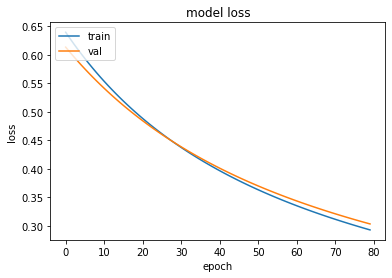

In [ ]:
import matplotlib.pyplot as plt
epchist=list(range(1, 151))

plt.plot(losshist)
plt.plot(vlosshist)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Accuracy Curve

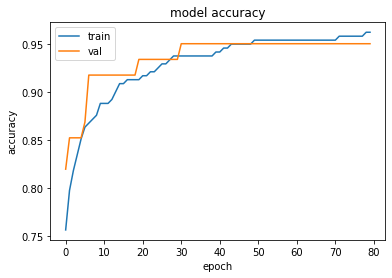

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(acchist)
plt.plot(vacchist)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

*ROC* AUC Curve

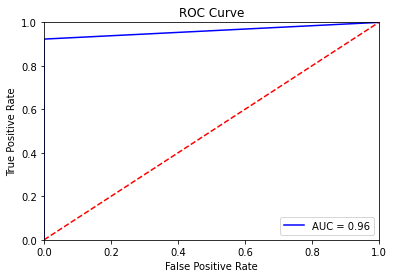

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = (model(X_test) > 0.5)

fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

87% Accuracy 

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 12)                168       
                                                                 
 dense_18 (Dense)            (None, 12)                156       
                                                                 
 dense_19 (Dense)            (None, 1)                 13        
                                                                 
Total params: 337
Trainable params: 337
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/200
43/43 [==============================] - 1s 6ms/step - loss: 0.6921 - accuracy: 0.5403 - val_loss: 0.6878 - val_accuracy: 0.5604
Epoch 2/200
43/43 [==============================] - 0s 3ms/step - loss: 0.6800 - accuracy: 0.5355 - val_loss: 0.6591 - val_accuracy: 0.5604
Epoch 3/200
43/43 [==============

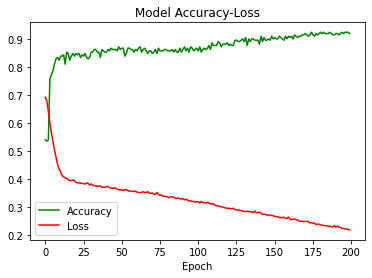

3/3 [==============================] - 0s 4ms/step - loss: 0.3639 - accuracy: 0.8791


0.8791208863258362

In [ ]:

#Initialising ANN
model2 = Sequential()

#Adding the first hidden layer or the input layer
model2.add(Dense(activation='relu',
                     kernel_initializer='uniform',
                     input_dim=13,
                     units=12))
#Adding the second hidden layer
model2.add(Dense(activation='relu',
                     kernel_initializer='uniform',
                     units=12))
#Adding the output layer
model2.add(Dense(activation='sigmoid',
                     kernel_initializer='uniform',
                     units=1))

#Compiling the ANN
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
print(model2.summary())

#Fitting the ANN
history2 = model2.fit(X_train_enc, Y_train, batch_size=5,validation_data=(X_test_enc,Y_test), epochs=200, verbose=1)
from matplotlib import pyplot as plt
plt.plot(history2.history['accuracy'],'green')
plt.plot(history2.history['loss'],'red')
plt.title('Model Accuracy-Loss')
plt.xlabel('Epoch')
plt.legend(['Accuracy','Loss'])
plt.show()

model2.evaluate(X_test_enc,Y_test)[1]

In [ ]:
pred=(model2.predict(X_test_enc) > 0.5).astype(int)
acc=round(accuracy_score(Y_test, pred),4)
pre=round(precision_score(Y_test, pred,average='weighted'),4)
re=round(recall_score(Y_test, pred,average='weighted'),4)
f1=round(f1_score(Y_test, pred,average='weighted'),4)
print("Accuracy=",acc," Precision=",pre," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8791  Precision= 0.8817  Recall= 0.8791  F1 Score=  0.8795


Accuracy Curve

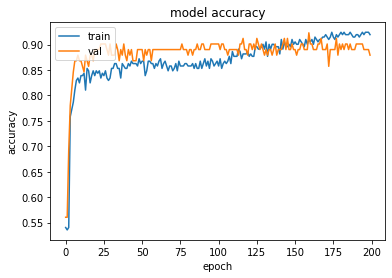

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Loss Curve

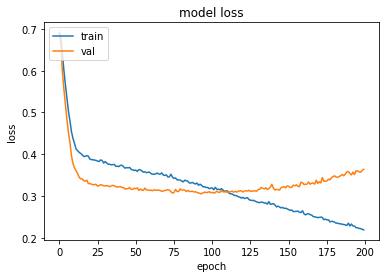

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

*ROC* AUC Curve

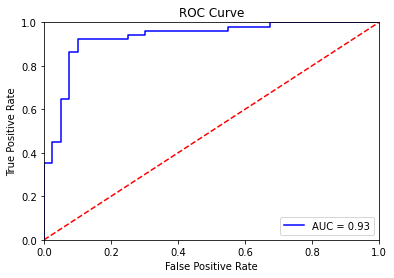

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = model2.predict(X_test_sc)

fpr, tpr, threshold = metrics.roc_curve(y_test_new.argmax(axis=1), preds)
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



LSTM (77% Accuracy)

In [ ]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [ ]:
data = pd.read_csv('heart.csv')

X = data.iloc[:,:13].values
y = data["target"].values

X_train,X_test,y_train, y_test = train_test_split(X,y,test_size = 0.2 , random_state = 0 )

In [ ]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train_ = X_train[:, :, np.newaxis]
X_test = X_test[:, :, np.newaxis]

In [ ]:
classifier = Sequential()
classifier.add(LSTM(100,input_shape=(X_train_.shape[1:])))
classifier.add(Dense(100, activation='relu'))
classifier.add(Dense(100, activation='relu'))
classifier.add(Dense(100, activation='relu'))
classifier.add(Dense(activation = "sigmoid", units = 1))
optimizer = tf.keras.optimizers.Adam(lr=0.001)
classifier.compile(optimizer = optimizer , loss = 'binary_crossentropy', 
                   metrics = ['accuracy'] )

In [ ]:
classifier.fit(X_train , y_train , batch_size = 10 ,epochs = 90  )

Epoch 1/90
25/25 [==============================] - 2s 9ms/step - loss: 0.6641 - accuracy: 0.6322
Epoch 2/90
25/25 [==============================] - 0s 9ms/step - loss: 0.6051 - accuracy: 0.7025
Epoch 3/90
25/25 [==============================] - 0s 9ms/step - loss: 0.5664 - accuracy: 0.7231
Epoch 4/90
25/25 [==============================] - 0s 9ms/step - loss: 0.5599 - accuracy: 0.7355
Epoch 5/90
25/25 [==============================] - 0s 9ms/step - loss: 0.5510 - accuracy: 0.7479
Epoch 6/90
25/25 [==============================] - 0s 8ms/step - loss: 0.5449 - accuracy: 0.7438
Epoch 7/90
25/25 [==============================] - 0s 9ms/step - loss: 0.5334 - accuracy: 0.7521
Epoch 8/90
25/25 [==============================] - 0s 10ms/step - loss: 0.5222 - accuracy: 0.7521
Epoch 9/90
25/25 [==============================] - 0s 9ms/step - loss: 0.4944 - accuracy: 0.7727
Epoch 10/90
25/25 [==============================] - 0s 9ms/step - loss: 0.4917 - accuracy: 0.7562
Epoch 11/90
25/25 

In [ ]:
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)
cm = confusion_matrix(y_test,y_pred)
print('Confusion Matrix:',cm)
print('Accuracy:',accuracy_score(y_test,y_pred)*100)
print('Precision:',precision_score(y_test,y_pred)*100)
print('Recall:',recall_score(y_test,y_pred)*100)
print('F1 Score:',f1_score(y_test,y_pred)*100)

Confusion Matrix: [[22  5]
 [ 9 25]]
Accuracy: 77.04918032786885
Precision: 83.33333333333334
Recall: 73.52941176470588
F1 Score: 78.125


Model 4: CNN

In [ ]:
from keras.preprocessing import sequence
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D,BatchNormalization
from keras.datasets import imdb
from keras import optimizers
import matplotlib.pyplot as plt
import numpy as np


In [ ]:
model4 = Sequential()

model4.add(Conv1D(128,
                input_shape=[13, 1],
                kernel_size=4,
                strides=1
                 ))
model4.add(BatchNormalization())
model4.add(Conv1D(filters=128,
                 kernel_size=4,
                 padding='same',
                 activation='relu',
                 strides=1))
model4.add(BatchNormalization())

model4.add(Conv1D(filters=256,
                 kernel_size=4,
                 padding='same',
                 activation='relu',
                 strides=1))
model4.add(GlobalMaxPooling1D())
model4.add(Dense(100))
model4.add(Activation('relu'))
model4.add(Dense(2, activation='sigmoid'))

model4.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])      

In [ ]:
history = model4.fit(X_train_sc, y_train_new,
                    batch_size=10,
                    epochs=15,
                    validation_data=(X_test_sc, y_test_new))

Epoch 1/15
22/22 [==============================] - 2s 24ms/step - loss: 0.6742 - accuracy: 0.6967 - val_loss: 0.6477 - val_accuracy: 0.6374
Epoch 2/15
22/22 [==============================] - 0s 15ms/step - loss: 0.5443 - accuracy: 0.7773 - val_loss: 0.5876 - val_accuracy: 0.8571
Epoch 3/15
22/22 [==============================] - 0s 16ms/step - loss: 0.4862 - accuracy: 0.7820 - val_loss: 0.5945 - val_accuracy: 0.7912
Epoch 4/15
22/22 [==============================] - 0s 14ms/step - loss: 0.3788 - accuracy: 0.8246 - val_loss: 0.5667 - val_accuracy: 0.8022
Epoch 5/15
22/22 [==============================] - 0s 14ms/step - loss: 0.3344 - accuracy: 0.8436 - val_loss: 0.5533 - val_accuracy: 0.8022
Epoch 6/15
22/22 [==============================] - 0s 15ms/step - loss: 0.2896 - accuracy: 0.9052 - val_loss: 0.5106 - val_accuracy: 0.8022
Epoch 7/15
22/22 [==============================] - 0s 14ms/step - loss: 0.4258 - accuracy: 0.8009 - val_loss: 0.5385 - val_accuracy: 0.7473
Epoch 8/15
22

In [ ]:
ac,pr,re,f1 = getClassificationResult(model4,X_test_sc,y_test_new)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.8681  Precision= 0.8681  Recall= 0.8681  F1 Score=  0.8677


Accuracy Curve

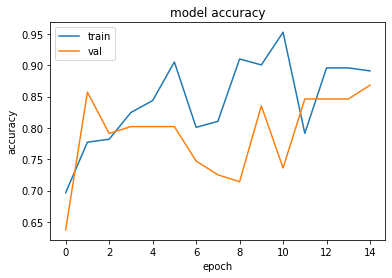

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Loss Curve

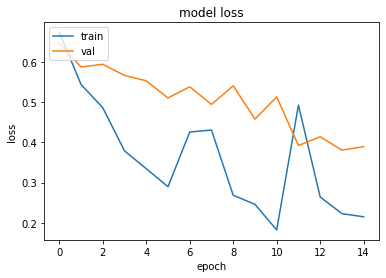

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

ROC AUC Curve

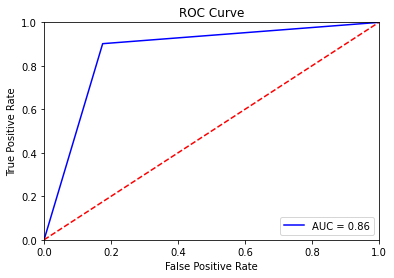

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = model4.predict(X_test_sc)

fpr, tpr, threshold = metrics.roc_curve(y_test_new.argmax(axis=1), preds.argmax(axis=1))
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()



Model Best Result 91% Accuracy

Using Early Stopping

In [ ]:
import tensorflow as tf
ACCURACY_THRESHOLD = 0.91
LOSS_THRESHOLD = 0.30
class myCallback(tf.keras.callbacks.Callback): 
    def on_epoch_end(self, epoch, logs={}): 
        if(logs.get('val_accuracy') > ACCURACY_THRESHOLD):   
            print("\nReached %2.2f%% accuracy, so stopping training!!" %(ACCURACY_THRESHOLD*100))   
            self.model.stop_training = True
        
callbacks = myCallback()        

In [ ]:
model3=Sequential()
#first layer
model3.add(Dense(100,input_shape=(10,)))
model3.add(Activation('relu'))

#second layer
model3.add(Dense(200))
model3.add(Activation('relu'))

#third layer
model3.add(Dense(100))
model3.add(Activation('relu'))



#final layer
model3.add(Dense(2))
model3.add(Activation('sigmoid'))

model3.compile(loss='binary_crossentropy',metrics=['accuracy'],optimizer='adam')

In [ ]:
history3=model3.fit(X_train_fs,y_train_new,batch_size=32,epochs=150,validation_data=(X_test_fs,y_test_new),callbacks=callbacks)

Epoch 1/150
7/7 [==============================] - 1s 36ms/step - loss: 1.8098 - accuracy: 0.5071 - val_loss: 0.7201 - val_accuracy: 0.6484
Epoch 2/150
7/7 [==============================] - 0s 9ms/step - loss: 1.0763 - accuracy: 0.5735 - val_loss: 1.6682 - val_accuracy: 0.4396
Epoch 3/150
7/7 [==============================] - 0s 6ms/step - loss: 1.1995 - accuracy: 0.5308 - val_loss: 0.9514 - val_accuracy: 0.5824
Epoch 4/150
7/7 [==============================] - 0s 7ms/step - loss: 0.9084 - accuracy: 0.5972 - val_loss: 0.7348 - val_accuracy: 0.6264
Epoch 5/150
7/7 [==============================] - 0s 7ms/step - loss: 0.7453 - accuracy: 0.6303 - val_loss: 0.7309 - val_accuracy: 0.6154
Epoch 6/150
7/7 [==============================] - 0s 9ms/step - loss: 0.6990 - accuracy: 0.6351 - val_loss: 0.6786 - val_accuracy: 0.6264
Epoch 7/150
7/7 [==============================] - 0s 7ms/step - loss: 0.7010 - accuracy: 0.6209 - val_loss: 0.5909 - val_accuracy: 0.6593
Epoch 8/150
7/7 [=========

In [ ]:
ac,pr,re,f1 = getClassificationResult(model3,X_test_fs,y_test_new)
print("Accuracy=",ac," Precision=",pr," Recall=",re," F1 Score= ",f1)

Accuracy= 0.9121  Precision= 0.9144  Recall= 0.9121  F1 Score=  0.9114


Accuracy Curve

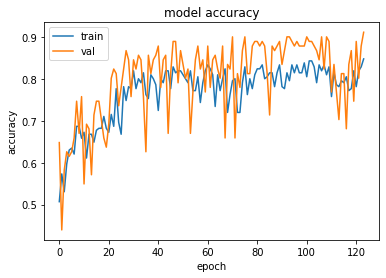

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

Loss Curve

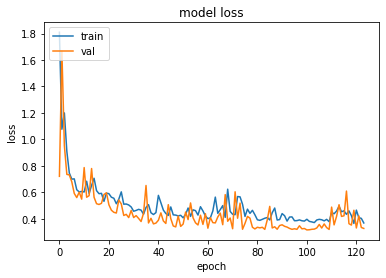

In [ ]:
import matplotlib.pyplot as plt


plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

ROC AUC Curve

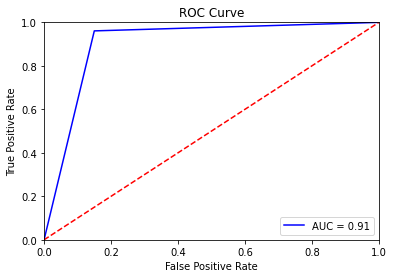

In [ ]:
import sklearn.metrics as metrics
# calculate the fpr and tpr for all thresholds of the classification
preds = model3.predict(X_test_fs)

fpr, tpr, threshold = metrics.roc_curve(y_test_new.argmax(axis=1), preds.argmax(axis=1))
roc_auc = metrics.auc(fpr, tpr)

# method I: plt
import matplotlib.pyplot as plt
plt.title('ROC Curve')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

